In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\apkin\Downloads\fraud_oracle.csv\fraud_oracle.csv")

## 1. EDA

In [3]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
df.info()

# mixture of numerical and categorical columns. Categorical columns will need to be encoded

# FraudFound_P is our target variable for prediction (0 and 1). Supervised classification models must be used

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [5]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [6]:
df.describe(include='object').T

,count,unique,top,freq
Month,15420,12,Jan,1411
DayOfWeek,15420,7,Monday,2616
Make,15420,19,Pontiac,3837
AccidentArea,15420,2,Urban,13822
DayOfWeekClaimed,15420,8,Monday,3757
MonthClaimed,15420,13,Jan,1446
Sex,15420,2,Male,13000
MaritalStatus,15420,4,Married,10625
Fault,15420,2,Policy Holder,11230
PolicyType,15420,9,Sedan - Collision,5584


In [7]:
# Check for missing values
print(df.isnull().sum())

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64


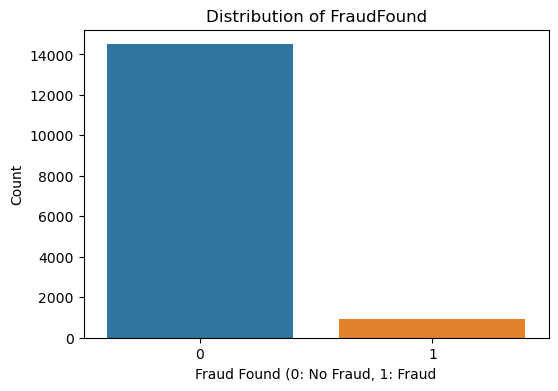

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='FraudFound_P', data=df)
plt.title('Distribution of FraudFound')
plt.xlabel('Fraud Found (0: No Fraud, 1: Fraud')
plt.ylabel('Count')
plt.show()

In [9]:
print(df['FraudFound_P'].value_counts())

FraudFound_P
0    14497
1      923
Name: count, dtype: int64


The majority of instances are labeled as "0" (No Fraud), while a much smaller portion is labeled as "1" (Fraud).
This imbalance is typical in fraud detection datasets and poses a challenge for modeling since many machine learning algorithms might get biased toward the majority class.

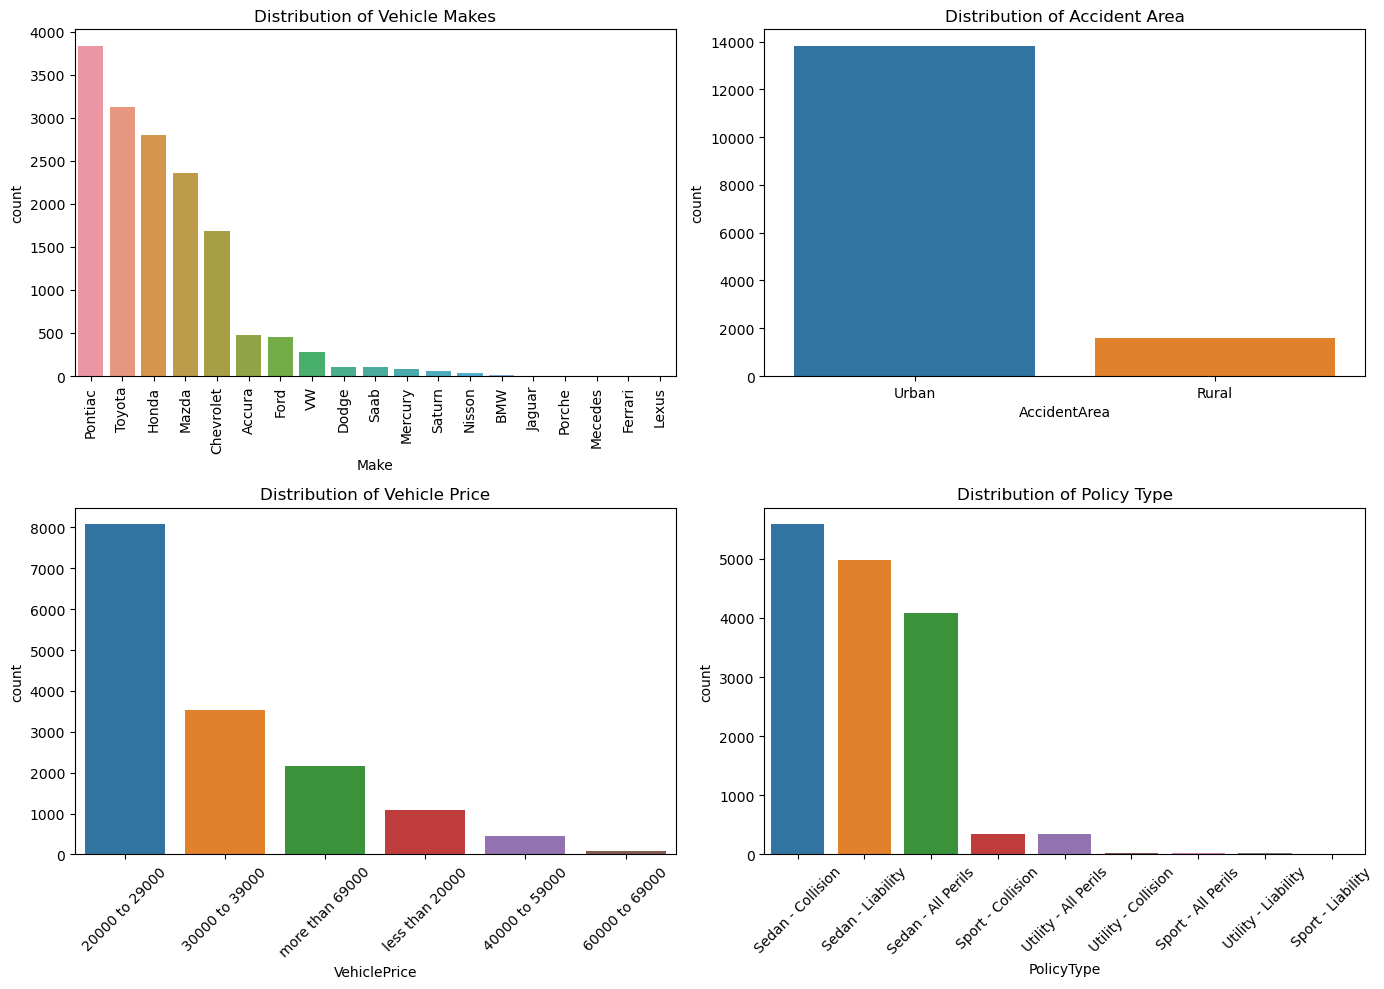

In [10]:
# Visualizing some key categorical variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(ax=axes[0, 0], x='Make', data=df, order=df['Make'].value_counts().index)
axes[0, 0].set_title('Distribution of Vehicle Makes')
axes[0, 0].tick_params(axis='x', rotation=90)

sns.countplot(ax=axes[0, 1], x='AccidentArea', data=df)
axes[0, 1].set_title('Distribution of Accident Area')

sns.countplot(ax=axes[1, 0], x='VehiclePrice', data=df, order=df['VehiclePrice'].value_counts().index)
axes[1, 0].set_title('Distribution of Vehicle Price')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[1, 1], x='PolicyType', data=df, order=df['PolicyType'].value_counts().index)
axes[1, 1].set_title('Distribution of Policy Type')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

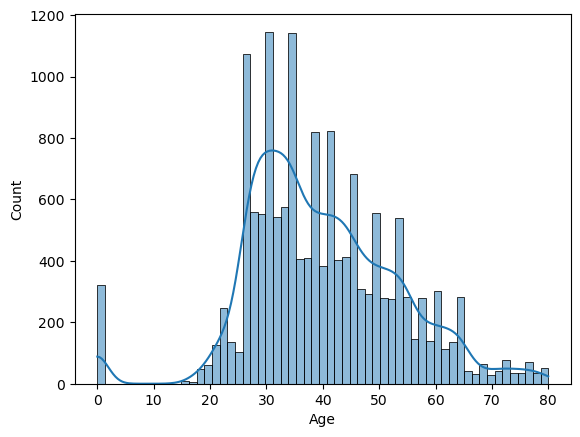

In [11]:
sns.histplot(df['Age'], kde=True)

This histogram shows an anomaly/error - we can't have drivers who are 0 years old

In [12]:
count_zero_age = df['Age'].value_counts()[0]
print(f"Number of Age 0 in dataset: {count_zero_age}")

Number of Age 0 in dataset: 320


In [13]:
median_age = df[df['Age'] != 0]['Age'].median() 

# Replace Age 0 values with the median
df['Age'] = df['Age'].replace(0, median_age)


In [14]:
print(df['Age'].describe()) #confirmed that 0 has been removed

count    15420.000000
mean        40.665045
std         12.183501
min         16.000000
25%         31.000000
50%         39.000000
75%         48.000000
max         80.000000
Name: Age, dtype: float64


In [15]:
fraud_by_driver_rating = df.groupby('DriverRating')['FraudFound_P'].mean()

# Print the fraud rate for each Driver Rating
print(fraud_by_driver_rating)

DriverRating
1    0.058824
2    0.056301
3    0.062307
4    0.061989
Name: FraudFound_P, dtype: float64


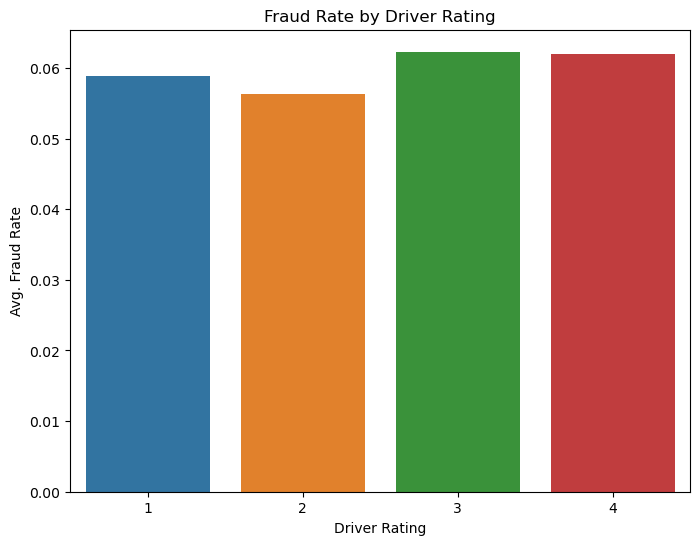

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_by_driver_rating.index, y=fraud_by_driver_rating.values)
plt.title('Fraud Rate by Driver Rating')
plt.xlabel('Driver Rating')
plt.ylabel('Avg. Fraud Rate')
plt.show()


In [18]:
fraud_by_past_claims = df.groupby('PastNumberOfClaims')['FraudFound_P'].mean()

# Print the fraud rate for each number of past claims
print(fraud_by_past_claims)

PastNumberOfClaims
1              0.062133
2 to 4         0.053601
more than 4    0.033831
none           0.077895
Name: FraudFound_P, dtype: float64


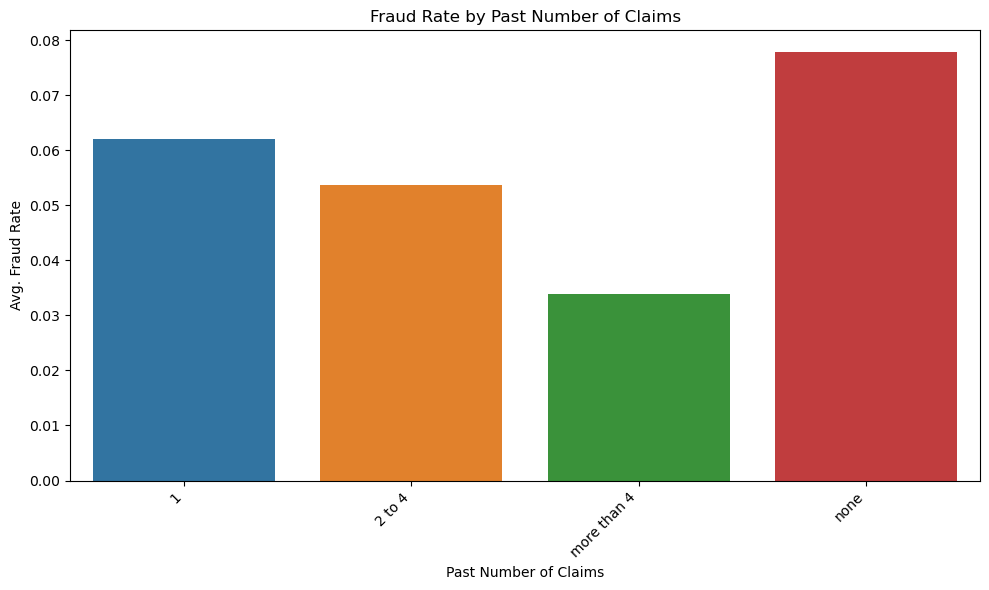

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_by_past_claims.index, y=fraud_by_past_claims.values)
plt.title('Fraud Rate by Past Number of Claims')
plt.xlabel('Past Number of Claims')
plt.ylabel('Avg. Fraud Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [20]:
# Analyze fraud by season

seasons = {
    "Jan": 'Winter',
    "Feb": 'Winter',
    "Mar": 'Spring',
    "Apr": 'Spring',
    "May": 'Spring',
    "Jun": 'Summer',
    "Jul": 'Summer',
    "Aug": 'Summer',
    "Sep": 'Autumn',
    "Oct": 'Autumn',
    "Nov": 'Autumn',
    "Dec": 'Winter'
}

# Map months to seasons
df['Season'] = df['Month'].map(seasons) #feature engineering season to our df


fraud_by_season = df.groupby('Season')['FraudFound_P'].mean()

In [21]:
fraud_by_season

Season
Autumn    0.051255
Spring    0.068879
Summer    0.060459
Winter    0.058304
Name: FraudFound_P, dtype: float64

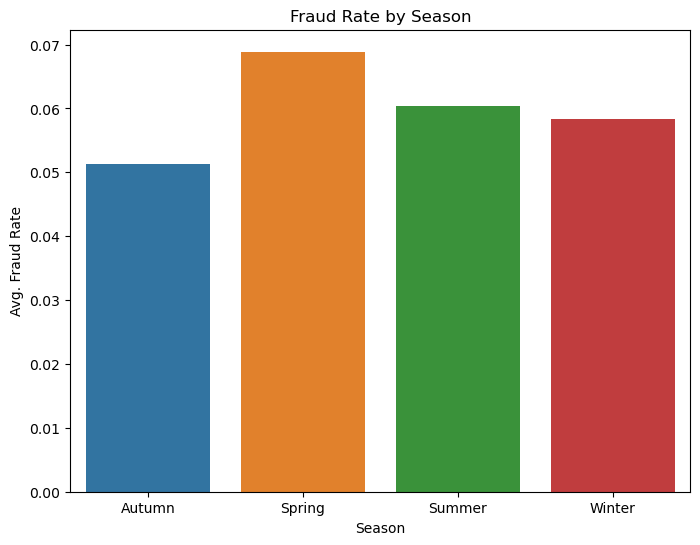

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_by_season.index, y=fraud_by_season.values)
plt.title('Fraud Rate by Season')
plt.xlabel('Season')
plt.ylabel('Avg. Fraud Rate')
plt.show()


In [23]:
# Feature engineering a AgeGroup column using Age

bins = [0, 25, 40, 60, 100]
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [24]:
fraud_by_age_marital = df.groupby(['AgeGroup', 'MaritalStatus'])['FraudFound_P'].mean().unstack()

print(fraud_by_age_marital)

MaritalStatus  Divorced   Married    Single     Widow
AgeGroup                                             
Young               NaN  0.060606  0.072566  0.000000
Adult           0.03125  0.068406  0.059279  0.222222
Middle-aged     0.04878  0.054283  0.047761  0.047619
Senior          0.00000  0.055690  0.065217  0.000000


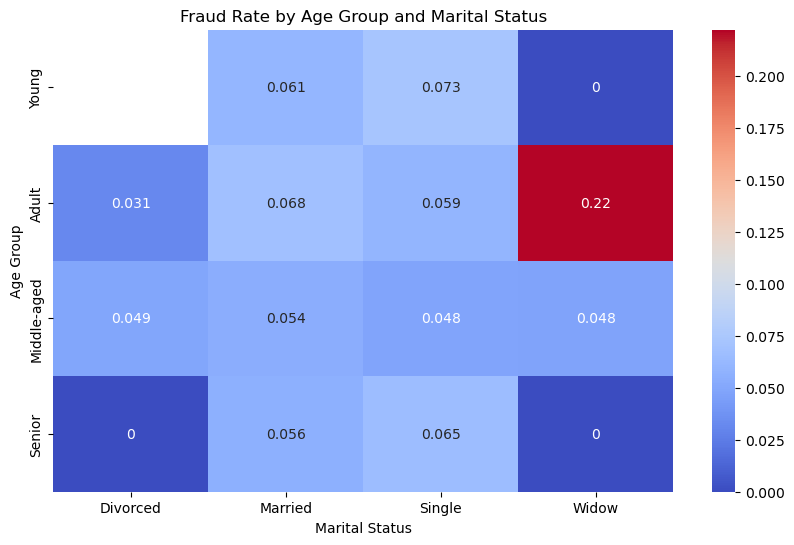

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(fraud_by_age_marital, annot=True, cmap='coolwarm')
plt.title('Fraud Rate by Age Group and Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Age Group')
plt.show()

In [25]:
num_variables = df[['WeekOfMonth','WeekOfMonthClaimed','Age','FraudFound_P',
                   'Deductible','DriverRating','Year']]

In [26]:
correlation_matrix = num_variables.corr()

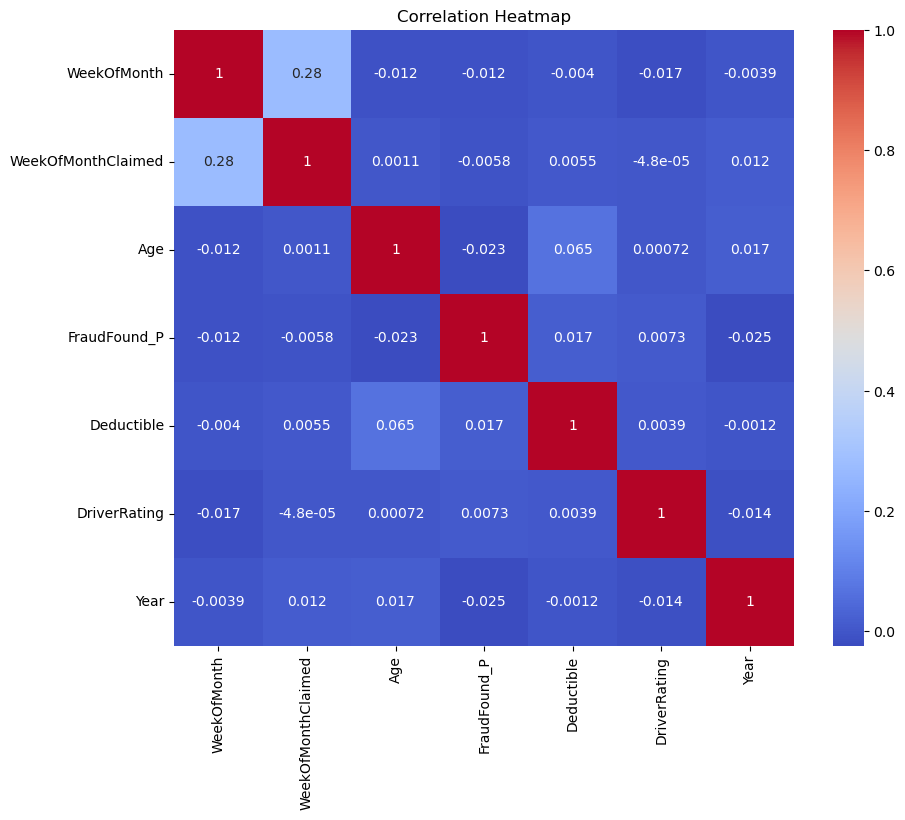

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# nothing extremely significant

## 2. Feature Engineering

In [28]:
from sklearn.preprocessing import OneHotEncoder

# Identifying nominal and ordinal variables. They will need to be encoded differently so the model doesn't treat non-ordinal
# categorical variables as ordered

nominal_vars = ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed',
                'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice',
                'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
                'AddressChange_Claim', 'BasePolicy']
ordinal_vars = ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'DriverRating', 'PastNumberOfClaims',
                'AgeOfVehicle', 'AgeOfPolicyHolder', 'NumberOfCars']

In [29]:
# apply one_hot_encoder to nominal variables
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
X_nominal = pd.DataFrame(one_hot_encoder.fit_transform(df[nominal_vars]),
                         columns=one_hot_encoder.get_feature_names_out(nominal_vars))


In [30]:
X_nominal.head()

,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,...,AgentType_Internal,NumberOfSuppliments_3 to 5,NumberOfSuppliments_more than 5,NumberOfSuppliments_none,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,BasePolicy_Collision,BasePolicy_Liability
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [31]:
# Apply Label Encoding to ordinal variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ordinal_vars:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X_ordinal = df[ordinal_vars]

In [32]:
X_ordinal.head()

,WeekOfMonth,WeekOfMonthClaimed,Age,DriverRating,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfCars
0,4,0,5,0,3,1,3,2
1,2,3,18,3,3,4,4,0
2,4,1,31,2,0,5,6,0
3,1,0,49,1,0,6,7,0
4,4,1,11,0,3,3,4,0


In [33]:
X_processed = pd.concat([X_ordinal, X_nominal], axis=1)

In [34]:
X_processed.head()

,WeekOfMonth,WeekOfMonthClaimed,Age,DriverRating,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfCars,Month_Aug,Month_Dec,...,AgentType_Internal,NumberOfSuppliments_3 to 5,NumberOfSuppliments_more than 5,NumberOfSuppliments_none,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,BasePolicy_Collision,BasePolicy_Liability
0,4,0,5,0,3,1,3,2,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,3,18,3,3,4,4,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,4,1,31,2,0,5,6,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1,0,49,1,0,6,7,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,4,1,11,0,3,3,4,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [35]:
X_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 95 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   WeekOfMonth                         15420 non-null  int64  
 1   WeekOfMonthClaimed                  15420 non-null  int64  
 2   Age                                 15420 non-null  int64  
 3   DriverRating                        15420 non-null  int64  
 4   PastNumberOfClaims                  15420 non-null  int32  
 5   AgeOfVehicle                        15420 non-null  int32  
 6   AgeOfPolicyHolder                   15420 non-null  int32  
 7   NumberOfCars                        15420 non-null  int32  
 8   Month_Aug                           15420 non-null  float64
 9   Month_Dec                           15420 non-null  float64
 10  Month_Feb                           15420 non-null  float64
 11  Month_Jan                           15420

In [36]:
y = df['FraudFound_P']

In [37]:
df_encoded = pd.concat([X_processed, y], axis=1)

In [38]:
df_encoded.head()

,WeekOfMonth,WeekOfMonthClaimed,Age,DriverRating,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfCars,Month_Aug,Month_Dec,...,NumberOfSuppliments_3 to 5,NumberOfSuppliments_more than 5,NumberOfSuppliments_none,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,BasePolicy_Collision,BasePolicy_Liability,FraudFound_P
0,4,0,5,0,3,1,3,2,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,2,3,18,3,3,4,4,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
2,4,1,31,2,0,5,6,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
3,1,0,49,1,0,6,7,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
4,4,1,11,0,3,3,4,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0


## 3. Data Pre-Processing

In [39]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
X_majority = X_processed[y == 0]
X_minority = X_processed[y == 1]

y_majority = y[y == 0]
y_minority = y[y == 1]


In [41]:
X_minority_upsampled, y_minority_upsampled = resample(X_minority, y_minority,
                                                      replace=True,
                                                      n_samples=X_majority.shape[0],
                                                      random_state=42)

In [42]:
# Combine the majority class with the upsampled minority class
X_balanced = pd.concat([X_majority, X_minority_upsampled])
y_balanced = pd.concat([y_majority, y_minority_upsampled])

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Output the shape of the processed data
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((23195, 95), (5799, 95), (23195,), (5799,))

## 4. Machine Learning Models

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

### 4.1 Logistic Regression

In [47]:
log_reg = LogisticRegression()

In [48]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [49]:
y_pred_log_reg = log_reg.predict(X_test_scaled)

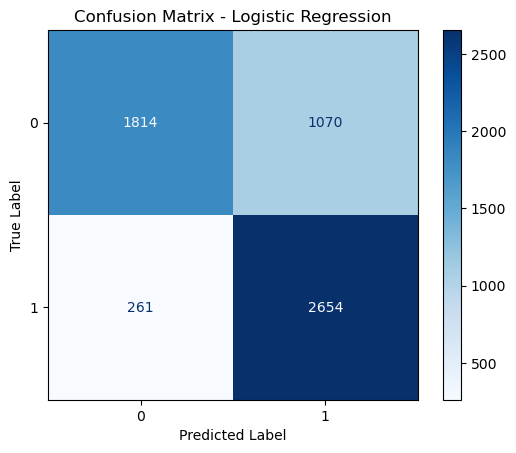

In [50]:
cm = confusion_matrix(y_test,y_pred_log_reg)
disp = ConfusionMatrixDisplay(cm)
# Plot confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [51]:
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.87      0.63      0.73      2884
           1       0.71      0.91      0.80      2915

    accuracy                           0.77      5799
   macro avg       0.79      0.77      0.77      5799
weighted avg       0.79      0.77      0.77      5799



Logistic Regression may not be the ideal model for predicting automobile fraud due to its relatively high error rate, particularly with a higher incidence of false positives. Although the company avoids paying out fraudulent claims, an overly sensitive model that incorrectly flags legitimate claims as fraud can negatively impact the company's reputation.

### 4.2 Random Forest

In [52]:
random_forest = RandomForestClassifier()

In [53]:
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [54]:
y_pred_rf = random_forest.predict(X_test_scaled)

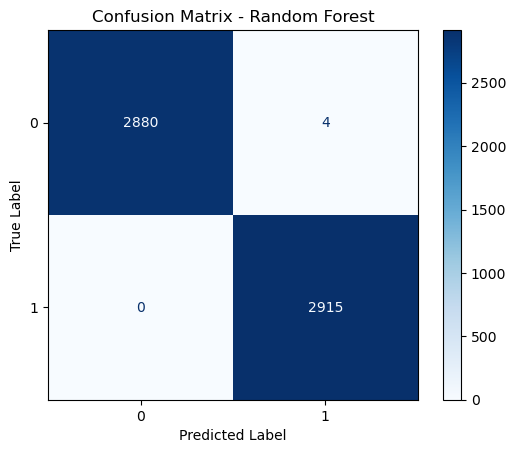

In [55]:
cm = confusion_matrix(y_test,y_pred_rf)
disp = ConfusionMatrixDisplay(cm)
# Plot confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [56]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2884
           1       1.00      1.00      1.00      2915

    accuracy                           1.00      5799
   macro avg       1.00      1.00      1.00      5799
weighted avg       1.00      1.00      1.00      5799



Extremely accurate model with close to 100% accuracy, but we need to investigate if there is overfitting. This will be done through cross validation

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
scores = cross_val_score(random_forest, X_train_scaled, y_train, cv=3)

In [59]:
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.9932747  0.99508536 0.99534342]
Mean cross-validation score: 0.9945678282213564


The Random Forest model shows consistent and high accuracy across both the test set and the cross-validation folds, with minimal variance in the cross-validation scores. This consistency indicates that the model is not overfitting and generalizes well to unseen data.

### 4.3 XGBoost

In [60]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

In [61]:
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [62]:
y_pred_xgb = xgb.predict(X_test_scaled)

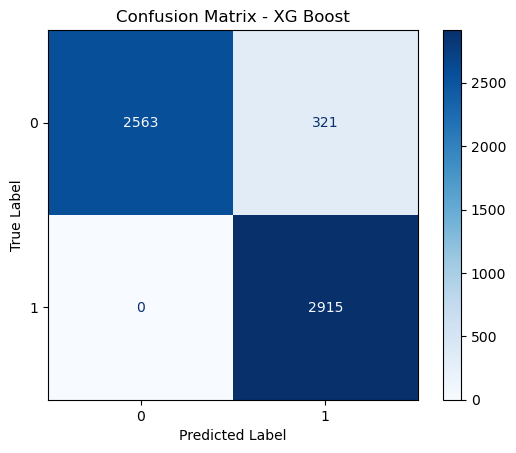

In [63]:
cm = confusion_matrix(y_test,y_pred_xgb)
disp = ConfusionMatrixDisplay(cm)
# Plot confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - XG Boost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [64]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      2884
           1       0.90      1.00      0.95      2915

    accuracy                           0.94      5799
   macro avg       0.95      0.94      0.94      5799
weighted avg       0.95      0.94      0.94      5799



In [65]:
# Extracting feature importances from the Random Forest model
feature_importances = random_forest.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})


importance_df = importance_df.sort_values(by='Importance', ascending=False)

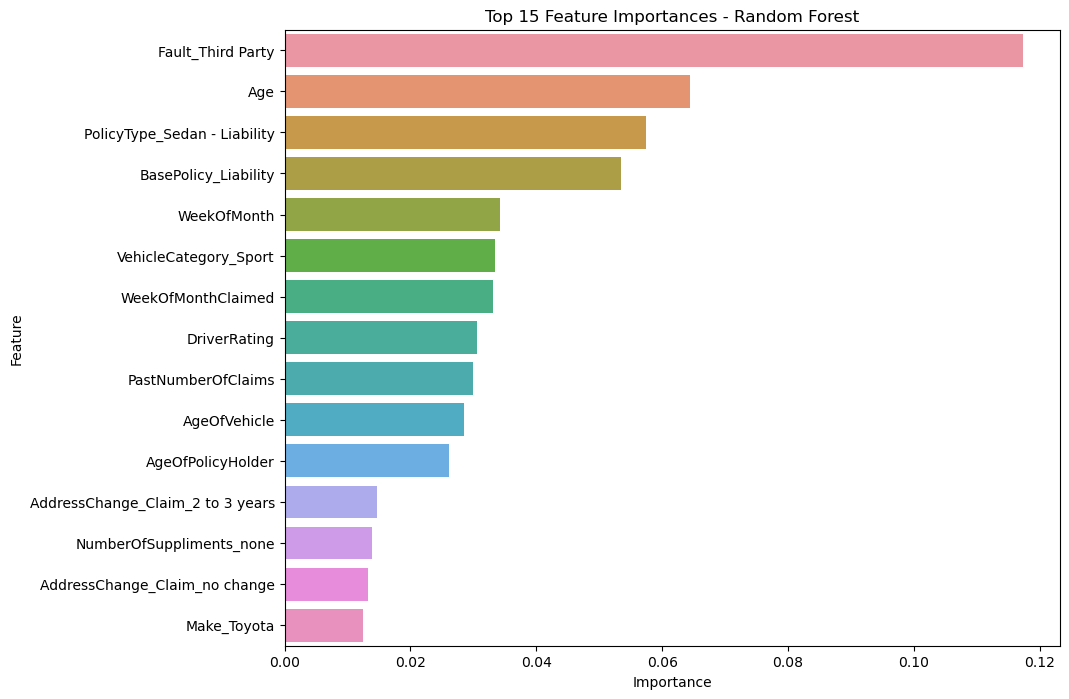

In [66]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Top 15 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# These features have the greatest impact on predicting whether a claim is fraudulent or not

## 5. Hyperparameter Tuning

### 5.1 XGBoost

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}


grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='accuracy')


grid_search_xgb.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [70]:
print(grid_search_xgb.best_params_)

print(grid_search_xgb.best_score_)

{'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200}
0.9715887044621686


In [71]:
y_predxg_grid = grid_search_xgb.predict(X_test_scaled)

In [72]:
print(classification_report(y_test,y_predxg_grid))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2884
           1       0.96      1.00      0.98      2915

    accuracy                           0.98      5799
   macro avg       0.98      0.98      0.98      5799
weighted avg       0.98      0.98      0.98      5799



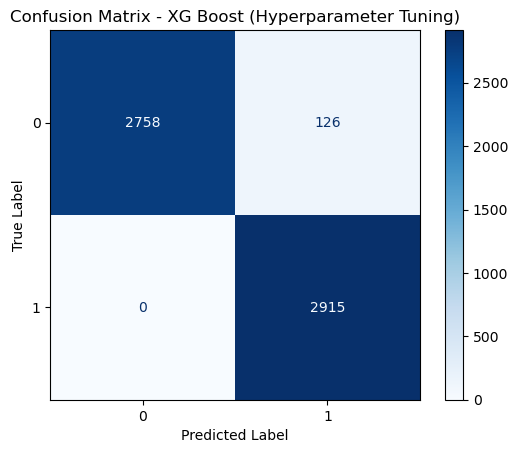

In [73]:
cm = confusion_matrix(y_test,y_predxg_grid)
disp = ConfusionMatrixDisplay(cm)
# Plot confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - XG Boost (Hyperparameter Tuning)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Performance of the XGBoost Model has increased significantly when utilizing the hyperparameters